In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import datetime as dt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [2]:
train_data = pd.read_csv('C:/Users/Krishnavamsi/Documents/Datasets/RnnBasic/Google_Stock_Price_Train.csv')

In [3]:
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1278 non-null   object 
 1   Open    1278 non-null   float64
 2   High    1278 non-null   float64
 3   Low     1278 non-null   float64
 4   Close   1278 non-null   object 
 5   Volume  1278 non-null   object 
dtypes: float64(3), object(3)
memory usage: 60.0+ KB


In [5]:
train_data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

In [7]:
train_data.sort_values(by = ['Date'], axis = 0, inplace = True)

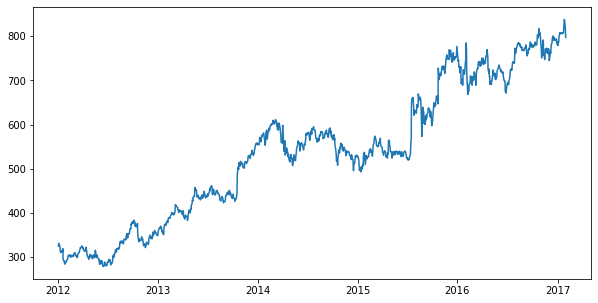

In [8]:
plt.figure(figsize = (10, 5))
plt.plot(train_data['Date'], train_data['Open'])
plt.show()

In [9]:
timeseriesdata = train_data.loc[:, ['Date', 'Open']]
timeseriesdata = timeseriesdata.set_index('Date')

In [10]:
decomposition = seasonal_decompose(timeseriesdata, period = 30)

In [11]:
trend = decomposition.trend
season = decomposition.seasonal
noise = decomposition.resid

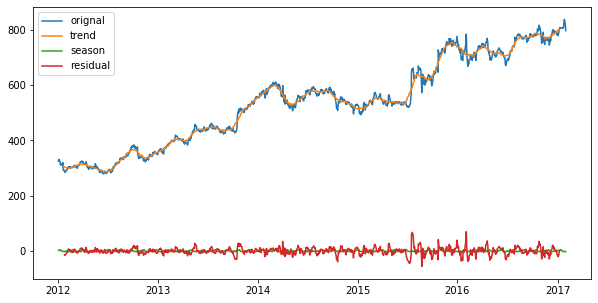

In [12]:
plt.figure(figsize = [10, 5])
#Orginal time series
plt.plot(timeseriesdata, label = 'orignal')
plt.legend(loc = 'best')

#Trend present in time series
plt.plot(trend, label = 'trend')
plt.legend(loc = 'best')

#Seasonality of time series
plt.plot(season, label = 'season')
plt.legend(loc = 'best')

#residual or noise of time series
plt.plot(noise, label = 'residual')
plt.legend(loc = 'best')
plt.show()

In [13]:
rolling_mean = timeseriesdata['Open'].rolling(window = 30).mean()
rolling_std = timeseriesdata['Open'].rolling(window = 30).std()

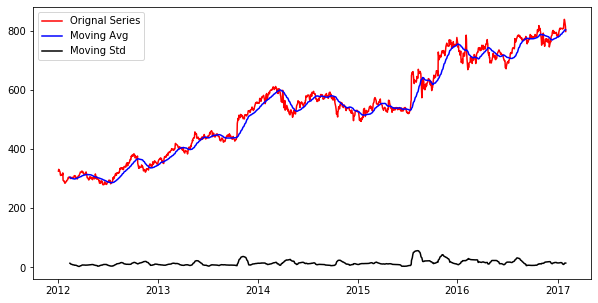

In [14]:
plt.figure(figsize = [10, 5])
plt.plot(timeseriesdata, color = 'red')
plt.plot(rolling_mean, color = 'blue')
plt.plot(rolling_std, color = 'black')
plt.legend(['Orignal Series', 'Moving Avg', 'Moving Std'])
plt.show()

In [15]:
differencedtimeseries = timeseriesdata['Open'] - rolling_mean

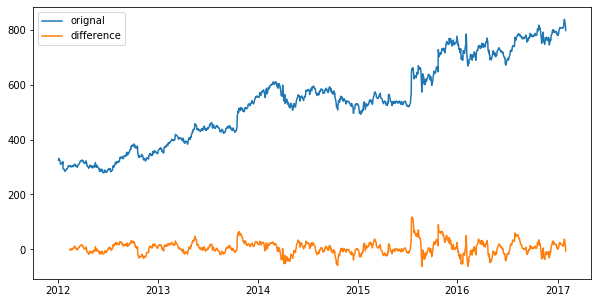

In [16]:
plt.figure(figsize = [10, 5])
plt.plot(timeseriesdata, label = 'orignal')
plt.plot(differencedtimeseries, label = 'difference')
plt.legend()
plt.show()

In [17]:
differencedtimeseries.dropna(inplace = True)

In [18]:
results = adfuller(differencedtimeseries)

In [19]:
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.752335
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


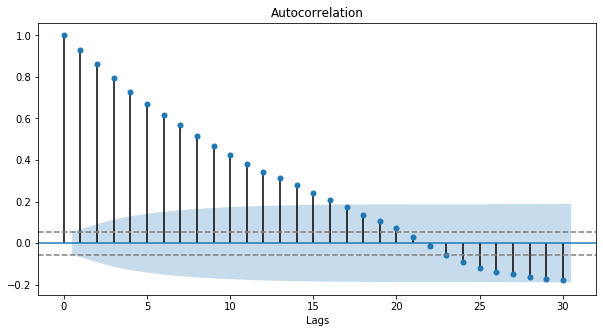

In [20]:
plt.rc('figure', figsize = [10, 5])
plot_acf(differencedtimeseries, lags = 30)
plt.axhline(y=-1.96/np.sqrt(len(differencedtimeseries)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(differencedtimeseries)),linestyle='--',color='gray')
plt.xlabel('Lags')
plt.show()

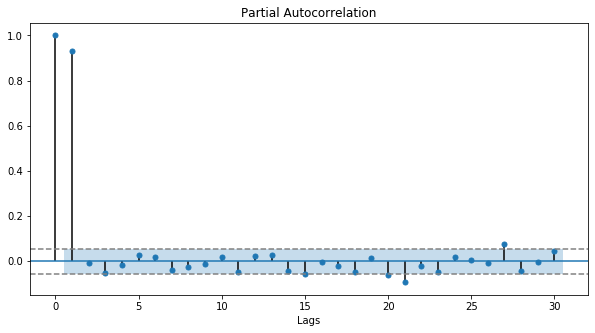

In [21]:
plt.rc('figure', figsize = [10, 5])
plot_pacf(differencedtimeseries, lags=30)
plt.axhline(y=-1.96/np.sqrt(len(differencedtimeseries)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(differencedtimeseries)),linestyle='--',color='gray')
plt.xlabel('Lags')
plt.show()

In [22]:
X = differencedtimeseries.iloc[0:1000]
y = differencedtimeseries.iloc[1000:]

model = ARIMA(X, order=(1, 0, 0))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

ARMA Model Results                              
Dep. Variable:                   Open   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -3514.687
Method:                       css-mle   S.D. of innovations              8.123
Date:                Sun, 19 Jul 2020   AIC                           7035.374
Time:                        21:13:10   BIC                           7050.097
Sample:                             0   HQIC                          7040.970
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9340      3.593      1.652      0.099      -1.108      12.976
ar.L1.Open     0.9294      0.012     80.480      0.000       0.907       0.952
                                    Roots                                    
    

In [23]:
differencedtimeseries

Date
2012-02-14    -0.118667
2012-02-15     1.235667
2012-02-16    -2.771333
2012-02-17    -0.742333
2012-02-21    -0.374667
                ...    
2017-01-25    31.050000
2017-01-26    37.481000
2017-01-27    33.020667
2017-01-30    12.395333
2017-01-31    -5.388667
Name: Open, Length: 1249, dtype: float64

In [24]:
y_forecast = model_fit.forecast(steps=len(differencedtimeseries.iloc[1000:]))[0]

In [25]:
y_forecast

array([-9.94815035, -8.82710611, -7.78519108, -6.81681988, -5.91680143,
       -5.08031101, -4.30286448, -3.58029422, -2.90872678, -2.28456209,
       -1.70445424, -1.16529345, -0.66418946, -0.19845604,  0.23440348,
        0.63670949,  1.01061862,  1.35813529,  1.68112239,  1.98131137,
        2.26031143,  2.5196182 ,  2.76062173,  2.98461396,  3.19279565,
        3.38628277,  3.56611256,  3.73324901,  3.88858809,  4.03296253,
        4.16714625,  4.29185858,  4.40776806,  4.51549604,  4.61562001,
        4.70867671,  4.79516497,  4.87554844,  4.95025802,  5.0196942 ,
        5.08422921,  5.144209  ,  5.19995511,  5.25176635,  5.29992049,
        5.34467566,  5.38627177,  5.42493181,  5.46086302,  5.49425801,
        5.52529581,  5.5541428 ,  5.58095362,  5.60587199,  5.62903149,
        5.65055627,  5.67056172,  5.68915508,  5.70643602,  5.72249718,
        5.73742466,  5.75129848,  5.76419301,  5.77617738,  5.78731583,
        5.79766807,  5.80728959,  5.81623197,  5.82454316,  5.83

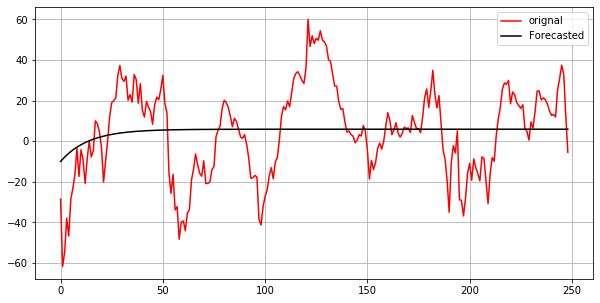

In [26]:
plt.figure(figsize=[10, 5])
plt.plot(differencedtimeseries.iloc[1000:].values, color = 'red')
plt.plot(y_forecast, color = 'black')
plt.legend(['orignal', 'Forecasted'])
plt.grid()
plt.show()

In [27]:
ts = pd.DataFrame({
    'week': differencedtimeseries.index.to_series().dt.week,
    'Values': differencedtimeseries.values
}, index = differencedtimeseries.index)

In [28]:
ts.head()

,week,Values
Date,,
2012-02-14,7,-0.118667
2012-02-15,7,1.235667
2012-02-16,7,-2.771333
2012-02-17,7,-0.742333
2012-02-21,8,-0.374667


In [29]:
temp = pd.get_dummies(ts['week'], prefix = 'week', drop_first = True)
ts = pd.concat([ts, temp], axis = 1)
ts.drop(columns = ['week'], inplace = True)

In [30]:
ts.head()

,Values,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,...,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-14,-0.118667,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-15,1.235667,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-16,-2.771333,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-17,-0.742333,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-21,-0.374667,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
trainset = ts.iloc[0:1000, :]
testset = ts.iloc[1000:, :]

In [32]:
ols_X = trainset.iloc[:, 1:]
ols_y = trainset.iloc[:, 0]

ols_X = sm.add_constant(ols_X)
model = sm.OLS(ols_y, ols_X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Values   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     5.080
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           8.86e-26
Time:                        21:13:28   Log-Likelihood:                -4391.6
No. Observations:                1000   AIC:                             8889.
Df Residuals:                     947   BIC:                             9149.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1538      4.871      0.647      0.517      -6.405      12.713
week_2        -6.1479      6.625     -0.928      0.354     -19.150       6.854
week_3        -9.3489      6.705     -1.394      0.164     -22.507       3.809
week_4         0.4743      6.889      0.069      0.945     -13.044      13.993
week_5         8.5784      6.705      1.279      0.201      -4.580      21.736
week_6         9.2405      7.115      1.299      0.194      -4.722      23.202
week_7        10.7403      6.705      1.602      0.110      -2.418      23.898
week_8        14.2004      6.995      2.030      0.043       0.472      27.929
week_9        12.4679      6.625      1.882      0.060      -0.534      25.470
week_10       17.5098      6.625      2.643      0.008       4.508      30.512
week_11        7.0483      6.625      1.064      0.288      -5.954      20.050
week_12        2.3686      6.625      0.358      0.721     -10.633      15.370
week_13       -3.2735      6.705     -0.488      0.625     -16.432       9.885
week_14      -10.8820      6.792     -1.602      0.109     -24.212       2.448
week_15      -19.5900      6.625     -2.957      0.003     -32.592      -6.588
week_16      -22.0492      6.705     -3.289      0.001     -35.207      -8.891
week_17      -16.3721      6.625     -2.471      0.014     -29.374      -3.370
week_18       -9.4114      6.625     -1.421      0.156     -22.413       3.590
week_19       -6.5964      6.625     -0.996      0.320     -19.598       6.405
week_20        3.6484      6.625      0.551      0.582      -9.353      16.650
week_21        3.9319      6.625      0.593      0.553      -9.070      16.934
week_22        4.4482      6.995      0.636      0.525      -9.280      18.177
week_23       -1.7533      6.625     -0.265      0.791     -14.755      11.249
week_24       -2.4278      6.625     -0.366      0.714     -15.430      10.574
week_25       -3.3991      6.625     -0.513      0.608     -16.401       9.603
week_26       -0.2864      6.625     -0.043      0.966     -13.288      12.715
week_27        2.0218      6.995      0.289      0.773     -11.707      15.750
week_28        1.1527      6.625      0.174      0.862     -11.849      14.155
week_29       15.7250      6.625      2.373      0.018       2.723      28.727
week_30       33.4170      6.625      5.044      0.000      20.415      46.419
week_31       18.3932      6.625      2.776      0.006       5.391      31.395
week_32       11.0604      6.625      1.669      0.095      -1.941      24.062
week_33       11.6802      6.625      1.763      0.078      -1.322      24.682
week_34        7.4221      6.625      1.120      0.263      -5.580      20.424
week_35       -9.7633      6.625     -1.474      0.141     -22.765       3.239
week_36       -8.0305      6.889     -1.166      0.244     -21.549       5.488
we

In [33]:
features = ['week_10','week_15','week_16','week_17','week_29','week_30','week_31','week_44','week_45']

X_train = trainset.loc[:, features].values
y_train = trainset.loc[:, ['Values']].values
y_train = y_train.reshape(1000)

rf_model = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [34]:
X_test = testset.loc[:, features].values
y_pred = rf_model.predict(X_test)

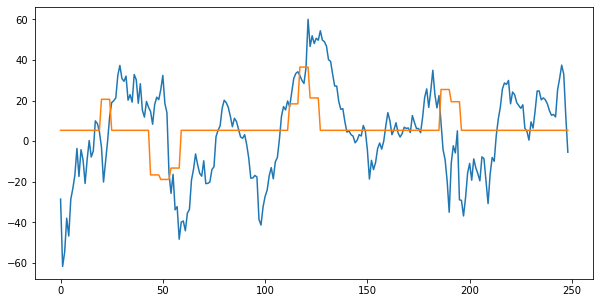

In [35]:
plt.plot(testset.iloc[:, 0].values, label = 'orignal')
plt.plot(y_pred, label = 'predicted')
plt.show()

In [36]:
train_set = differencedtimeseries.iloc[0:1000]
test_set = differencedtimeseries.iloc[1000:]

In [37]:
X_train = []
y_train = []
for i in range(30, len(train_set)):
    X_train.append(train_set.values[i - 30: i])
    y_train.append(train_set.values[i])

In [38]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [39]:
X_train.shape

(970, 30)

In [40]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [41]:
model = Sequential([
    tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (30, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50),
    tf.keras.layers.Dense(units = 1)
])

In [42]:
model.compile(optimizer = 'adam', loss = 'Huber', metrics = ['mae'])

In [43]:
model.fit(X_train, y_train, batch_size = 50, epochs = 100)

Epoch 1/100
20/20 [==============================] - 1s 62ms/step - loss: 16.0391 - mae: 16.5330
Epoch 2/100
20/20 [==============================] - 1s 56ms/step - loss: 14.5951 - mae: 15.0886
Epoch 3/100
20/20 [==============================] - 1s 57ms/step - loss: 13.3709 - mae: 13.8640
Epoch 4/100
20/20 [==============================] - 1s 61ms/step - loss: 12.6615 - mae: 13.1538
Epoch 5/100
20/20 [==============================] - 1s 53ms/step - loss: 11.9227 - mae: 12.4122
Epoch 6/100
20/20 [==============================] - 1s 58ms/step - loss: 11.1821 - mae: 11.6704
Epoch 7/100
20/20 [==============================] - 1s 57ms/step - loss: 10.1862 - mae: 10.6762
Epoch 8/100
20/20 [==============================] - 1s 59ms/step - loss: 9.4247 - mae: 9.9080
Epoch 9/100
20/20 [==============================] - 1s 56ms/step - loss: 8.8850 - mae: 9.3673
Epoch 10/100
20/20 [==============================] - 1s 58ms/step - loss: 8.4484 - mae: 8.9264
Epoch 11/100
20/20 [===============

In [44]:
X_test = []
y_test = []
for i in range(30, len(test_set)):
    X_test.append(test_set.values[i - 30: i])
    y_test.append(test_set.values[i])

In [45]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [46]:
y_pred = model.predict(X_test)

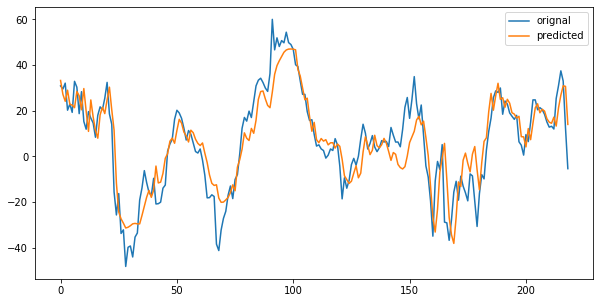

In [47]:
plt.figure(figsize = (10, 5))
plt.plot(y_test, label = 'orignal')
plt.plot(y_pred, label = 'predicted')
plt.legend()
plt.show()